In [1]:
# Importing the necessary libraries
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, DateType
from pyspark.sql.functions import col, sum, countDistinct, count, regexp_replace, split, month, year, size, element_at, struct, trim, avg, expr, lit
from pyspark.sql import functions as F
from pyspark.sql.window import Window

In [2]:
# Initiate Spark session with the name Amazon Electronics
spark = SparkSession.builder.appName("AmazonElectronics").getOrCreate()

23/09/25 18:35:34 WARN Utils: Your hostname, Karans-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.22.24.53 instead (on interface en5)
23/09/25 18:35:34 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/25 18:35:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/09/25 18:35:35 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
# Define the schema of the datastamp being used along with data_type
schema = StructType([
    StructField("timestamp", DateType(), True),
    StructField("asin", StringType(), True),  # Stands for Amazon Standard Identification Number
    StructField("brand", StringType(), True),
    StructField("buybox_seller", StringType(), True),
    StructField("final_price", StringType(), True),
    StructField("number_of_sellers", IntegerType(), True),
    StructField("root_bs_rank", IntegerType(), True),
    StructField("reviews_count", IntegerType(), True),
    StructField("currency", StringType(), True),
    StructField("image_url", StringType(), True),
    StructField("images_count", IntegerType(), True),
    StructField("title", StringType(), True),
    StructField("url", StringType(), True),
    StructField("video_count", IntegerType(), True),
    StructField("categories", StringType(), True),
    StructField("item_weight", StringType(), True),
    StructField("rating", DoubleType(), True),
    StructField("top_review", StringType(), True),
    StructField("seller_id", StringType(), True),
    StructField("availability", StringType(), True),
    StructField("product_dimensions", StringType(), True),
    StructField("discount", StringType(), True),
    StructField("initial_price", StringType(), True),
    StructField("description", StringType(), True),
    StructField("image", StringType(), True),
    StructField("answered_questions", IntegerType(), True),
    StructField("date_first_available", StringType(), True),
    StructField("model_number", StringType(), True),
    StructField("manufacturer", StringType(), True),
    StructField("department", StringType(), True),
    StructField("plus_content", StringType(), True),
    StructField("upc", StringType(), True),
    StructField("video", StringType(), True),
    StructField("seller_name", StringType(), True),
    StructField("ISBN10", StringType(), True),
    StructField("domain", StringType(), True),
    StructField("variations", StringType(), True),
    StructField("delivery", StringType(), True),
    StructField("final_price_high", StringType(), True),
    StructField("features", StringType(), True),
    StructField("format", StringType(), True),
    StructField("buybox_prices", StringType(), True)
])

In [4]:
file_path = '/Users/hipprofessional/Documents/Placement/Projects/Amazon Product Analysis (PySpark)/Amazon products dataset.csv'
start_time = time.time()
df = spark.read.csv(file_path, schema = schema, header = True, quote= '"', escape= '"')
end_time = time.time()

# This is done to calculate the execution time
execution_time = end_time - start_time
num_rows = df.count()
num_columns = len(df.columns)
print("Shape: {} rows and {} columns".format(num_rows, num_columns))
print("Execution Time using PySpark:", execution_time, "seconds")

Shape: 1004 rows and 42 columns
Execution Time using PySpark: 1.685495138168335 seconds


In [5]:
# Displaying a maximum of 34 columns so that we can scroll through our entire dataset horizontally
pd.options.display.max_columns = 41

In [6]:
# Checking out the first 3 rows of the dataframe
df.limit(6).toPandas()

23/09/25 18:35:39 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,timestamp,asin,brand,buybox_seller,final_price,number_of_sellers,root_bs_rank,reviews_count,currency,image_url,images_count,title,url,video_count,categories,item_weight,rating,top_review,seller_id,availability,...,initial_price,description,image,answered_questions,date_first_available,model_number,manufacturer,department,plus_content,upc,video,seller_name,ISBN10,domain,variations,delivery,final_price_high,features,format,buybox_prices
0,2022-10-03,B07W5RF3HH,Kensington,null,$29.49,19,80,114,$,https://m.media-amazon.com/images/I/41HY8rhd7T...,5,Kensington Portable Combination Cable Lock for...,https://www.amazon.com/dp/B07W5RF3HH?language=...,1,"Electronics,Computers & Accessories,Computer A...",‎4.8 ounces,4.1,Good fit and works wellWhen traveling in publi...,ATVPDKIKX0DER,In Stock.,...,null,Trust the industry standard to protect your la...,https://m.media-amazon.com/images/I/41HY8rhd7T...,10,"‎October 19, 2010",‎K64671AM,‎Kensington,‎Computers and Portables,true,null,true,null,null,www.amazon.com,null,"FREE delivery Sat, Oct 8,Or fastest delivery W...",null,Superior strength lockhead to resist tampering...,None,"{""buy_new"":null,""buy_used"":null,""discount"":nul..."
1,2023-09-10,B0C5J3P4FP,Jzyliti,Chumgap,9.99,1,1231,210,USD,https://m.media-amazon.com/images/I/519kCtmSNM...,1,Pro Power Saver Power Saver Electricity Saving...,https://www.amazon.com/Electricity-Saving-Hous...,0,"Electronics,Accessories & Supplies,Power Strip...",6.1 ounces,3.7,One of the units lights will not shine. We as...,A1M00XH600DFT1,In Stock,...,12,About this item Energy saving: The function of...,https://m.media-amazon.com/images/I/519kCtmSNM...,0,"May 16, 2023",null,Jzyliti,null,true,null,false,Chumgap,null,https://www.amazon.com/,None,"FREE delivery Saturday, September 16 on orders...",null,Energy saving The function of the power saving...,None,"{""discount"":""-17%"",""final_price"":9.99,""initial..."
2,2023-09-10,B0BC3Y5LDP,Tamispit,Sienfix_Store,29.99,2,2132,2087,USD,https://m.media-amazon.com/images/I/61SPoXa5gt...,1,"Smart Watch, 44mm Fitness Tracker Watch with 2...",https://www.amazon.com/tamispit-Swimming-Water...,0,"Electronics,Wearable Technology,Smartwatches",2.39 ounces,4.0,This was purchased by my wife as a present. Lo...,A3OJDUALT76EMY,In Stock,...,49.99,About this item 【Multi-Function Smart Watch】: ...,https://m.media-amazon.com/images/I/61SPoXa5gt...,0,"August 27, 2022",null,tamispit,Unisex Adult,false,null,false,Sienfix_Store,null,https://www.amazon.com/,"[{""asin"":""B0BC3Y5LDP"",""name"":""black""},{""asin"":...","FREE delivery Saturday, September 16 on orders...",null,【Multi-Function Smart Watch】 The Q9 PRO smartw...,None,"{""discount"":""-40%"",""final_price"":29.99,""initia..."
3,2023-09-10,B0C8SGDRX5,DYEYOY,DYEYOY USA,29.99,1,4431,1319,USD,https://m.media-amazon.com/images/I/71pRaqeCNJ...,1,951XL Ink Cartridges Compatible Replacement fo...,https://www.amazon.com/Cartridges-Compatible-R...,0,"Office Products,Office Electronics,Printers & ...",6.4 ounces,4.4,Will order again,A20EBBGLBGFXAW,In Stock,...,35.99,About this item 🖨️Compatible Printer: OfficeJe...,https://m.media-amazon.com/images/I/71pRaqeCNJ...,0,"June 21, 2023",951,DYEYOY,null,false,null,false,DYEYOY USA,null,https://www.amazon.com/,None,"FREE delivery Saturday, September 16,Or fastes...",null,🖨️Compatible Printer OfficeJet Pro 251dw 276dw...,None,"{""discount"":""$6.00 (17%)"",""final_price"":29.99,..."
4,2023-08-22,B08F6T1CJ7,HP,Amazon.com,699,5,9118,487,USD,https://m.media-amazon.com/images/I/81sJcFP6mA...,1,HP DesignJet T210 Large Format 24-inch Plotter...,https://www.amazon.com/HP-DesignJet-Compact-Wi...,0,"Office Products,Office Electronics,Printers & ...",47 pounds,4.4,My 25 yr old HP plotter finally started to giv...,ATVPDKIKX0DER,In Stock,...,699,"IDEAL FOR: Technical line-drawings, renders re...",https://m.media-amazon.com/images/I/81sJcFP6mA...,0,"September 3, 2020",8AG32A#B1K,HP DesignJet,null,false,null,false,Amazon.com,null,https://www.amazon.com/,"[{"

In [7]:
df.limit(6).collect()

[Row(timestamp=datetime.date(2022, 10, 3), asin='B07W5RF3HH', brand='Kensington', buybox_seller='null', final_price='$29.49', number_of_sellers=19, root_bs_rank=80, reviews_count=114, currency='$', image_url='https://m.media-amazon.com/images/I/41HY8rhd7TL.__AC_SX300_SY300_QL70_FMwebp_.jpg', images_count=5, title='Kensington Portable Combination Cable Lock for Laptops and Other Devices - Red (K64671AM)', url='https://www.amazon.com/dp/B07W5RF3HH?language=en_US&currency=USD', video_count=1, categories='Electronics,Computers & Accessories,Computer Accessories & Peripherals,Cable Security Devices', item_weight='\u200e4.8 ounces', rating=4.1, top_review='Good fit and works wellWhen traveling in public transport over hours, or passing from hotel to hotel, this cable lock would be useful to prevent nimble fingers from stealing your laptop, but, worse, disappear with years of data. The cable is mean to loop around an immobile fixture (rail, plumbing, fixture) and the lock fits into a "securit

In [8]:
# Selecting specific columns only
df.select('brand', 'title', 'images_count', 'video_count').limit(5).toPandas()

,brand,title,images_count,video_count
0,Kensington,Kensington Portable Combination Cable Lock for...,5,1
1,Jzyliti,Pro Power Saver Power Saver Electricity Saving...,1,0
2,Tamispit,"Smart Watch, 44mm Fitness Tracker Watch with 2...",1,0
3,DYEYOY,951XL Ink Cartridges Compatible Replacement fo...,1,0
4,HP,HP DesignJet T210 Large Format 24-inch Plotter...,1,0


In [9]:
# This tells us the distict products in the CSV file using asim column
# df.agg(countDistinct("asin")).collect()[0][0]

In [10]:
# To group the data by asin and return the count, essentially to find duolicates
(df.groupby('asin').count()).count()

CodeCache: size=131072Kb used=20459Kb max_used=20459Kb free=110612Kb
 bounds [0x00000001089d8000, 0x0000000109df8000, 0x00000001109d8000]
 total_blobs=8216 nmethods=7283 adapters=845
 compilation: disabled (not enough contiguous free space left)


Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


1003

In [11]:
# Filtering the dataframe for a specific brand
df.filter(col('brand') == 'HP').toPandas()

# snippet below can be used to limit the results to 3 rows
# df.filter(col('brand') == 'HP').limit(3).toPandas()

,timestamp,asin,brand,buybox_seller,final_price,number_of_sellers,root_bs_rank,reviews_count,currency,image_url,images_count,title,url,video_count,categories,item_weight,rating,top_review,seller_id,availability,...,initial_price,description,image,answered_questions,date_first_available,model_number,manufacturer,department,plus_content,upc,video,seller_name,ISBN10,domain,variations,delivery,final_price_high,features,format,buybox_prices
0,2023-08-22,B08F6T1CJ7,HP,Amazon.com,699,5,9118,487,USD,https://m.media-amazon.com/images/I/81sJcFP6mA...,1,HP DesignJet T210 Large Format 24-inch Plotter...,https://www.amazon.com/HP-DesignJet-Compact-Wi...,0,"Office Products,Office Electronics,Printers & ...",47 pounds,4.4,My 25 yr old HP plotter finally started to giv...,ATVPDKIKX0DER,In Stock,...,699,"IDEAL FOR: Technical line-drawings, renders re...",https://m.media-amazon.com/images/I/81sJcFP6mA...,0,"September 3, 2020",8AG32A#B1K,HP DesignJet,null,false,null,false,Amazon.com,null,https://www.amazon.com/,"[{""asin"":""B0B13TLC24"",""name"":""24-inch Plotter ...","FREE delivery Tuesday, August 29,Or fastest de...",null,"Ideal for Technical line drawings, renders req...",None,"{""discount"":""-13%"",""final_price"":699,""initial_..."
1,2022-09-19,B001QP7R18,HP,24/7 Toners,$78.89,29,24582,883,$,https://images-na.ssl-images-amazon.com/images...,13,Original HP 128A Cyan Toner Cartridge | Works ...,https://www.amazon.com/dp/B001QP7R18?language=...,1,"Office Products,Office Electronics,Printers & ...",1.58 pounds,4.7,1. The genius of the design (originally from C...,A3AF92OKLJUZNV,In Stock.,...,null,Be confident that Original HP Toner Cartridges...,https://images-na.ssl-images-amazon.com/images...,6,"July 26, 2017",CE321A,hp,Default Category,true,null,true,null,null,www.amazon.com,null,"FREE delivery Thu, Sep 22. Order within 9 hrs ...",null,"Count on high-quality, reliable printing and s...",None,"{""buy_new"":null,""buy_used"":null,""discount"":nul..."
2,2023-05-21,B004QD6ESO,HP,null,$74.89,26,42647,964,$,https://m.media-amazon.com/images/I/71PTm+pQTa...,6,HP 57 Tri-color Ink Cartridge | Works with Des...,https://www.amazon.com/dp/B004QD6ESO?language=...,1,"Office Products,Office Electronics,Printers & ...",1.92 ounces,4.6,I had a printer which only used HP toner and t...,A1UEW3GW612BDQ,In Stock,...,null,From the manufacturer .aplus-v2 .premium-aplus...,https://m.media-amazon.com/images/I/71PTm+pQTa...,19,"January 30, 2007",C6657AN#140,HP,null,true,null,true,null,null,www.amazon.com,null,"FREE delivery Wednesday, May 24.",null,Original HP Ink is engineered to work with HP ...,None,"{""sns_price"":{""base_price"":""$74.89"",""tiered_pr..."
3,2023-09-10,B07RGC9QSL,HP,IT Discount Center,122,70,559,1194,USD,https://m.media-amazon.com/images/I/81JOo0yGQQ...,1,"HP USB-C Dock G5, 5TW10AA#ABB, Wired, For Note...",https://www.amazon.com/HP-USB-C-5TW10AA-Wired-...,0,"Electronics,Computers & Accessories,Laptop Acc...",1.49 Pounds,4.4,I bought this to use with an HP EliteBook x360...,A1C5CB5COPHGP0,Only 12 left in stock - order soon,...,219,Universal docking for today's notebooks Get to...,https://m.media-amazon.com/images/I/81JOo0yGQQ...,0,"September 2, 2019",5TW10AA#ABA,HP Inc.,null,false,null,false,IT Discount Center,null,https://www.amazon.com/,None,"FREE delivery Saturday, September 16,Or fastes...",null,"For Elite x2 G4; Elite Book 735 G6, 745 G6, 83...",None,"{""discount"":""-44%"",""final_price"":122,""initial_..."
4,2023-05-18,B004Y37DEA,HP,null,$45.95,9,10887,1900,$,https://m.media-amazon.com/images/I/71LijOOTrc...,5,HP 21 | 2 Ink Cartridges | Black | C9351AN,https://www.amazon.com/dp/B004Y37DEA?language=...,1,"Office Products,Office Electronics,Printers & ...",‎2.24 ounces,4.7,because my local box store seems to not be int...,A38ZGDMWLCZA01,In Stock,...,null,From the manufacturer .aplus-v2 .premium-aplus...,https://m.media-amazon.com/images/I/71LijOOTrc...,35,"June 17, 2003",‎C9508FN#140,‎hp,null,true,null,true,null,null,www.amazon.com,null,"FR

In [12]:
# Filtering the dataframe for products with more than 5 images
df.filter(col('images_count') > 5).select('asin','images_count').toPandas()

,asin,images_count
0,B00DYT2XJK,8
1,B082HLTMWN,9
2,B00IZACUQE,7
3,B0B5RV63LR,8
4,B098B9642L,6
...,...,...
395,B08YNSN3FL,6
396,B094FFBQF5,7
397,B00IF159KW,6
398,B079L674MV,6


In [13]:
# Filtering the dataframe for products with more than 5 images and 5 videos
df.filter((col('images_count') > 5) & (col('video_count') > 5)).select('asin', 'brand', 'title', 'images_count', 'video_count').toPandas()

,asin,brand,title,images_count,video_count
0,B08DR8HYNG,SWITCHEASY,"SWITCHEASY CoverBuddy 2018-2020 iPad Pro 12.9""...",9,6
1,B0090EC5MS,Sony,Sony HDR-AS15 Action Video Camera (Black) (Dis...,15,6
2,B09M6G973R,DeskLogics,DeskLogics iPad Tablet Stand Holder for Desk -...,9,6
3,B0B3RMV18Q,KAMRUI,"KAMRUI Mini PC, 8GB RAM/128GB ROM Windows 10 P...",7,6
4,B0BBTFVHRH,FANGOR,WiFi Digital Picture Frame - Greeting Card Inc...,8,6
5,B098TTTG1Z,Trio,Mobile Pixels 14‘’ Trio Max Portable Monitor f...,6,6
6,B01HCF18OM,tomtoc,tomtoc 360 Protective Laptop Sleeve for 14-inc...,9,6
7,B08GP8LPB2,MUSICOZY,MUSICOZY Sleep Headphones Bluetooth 5.2 Headba...,7,6
8,B09WHC14RF,Miesherk STOCK,Case for Samsung Tab S8 Ultra: Heavy Duty Rugg...,7,6
9,B087792CQT,ViewSonic,ViewSonic 15.6 Inch 1080p Portable Monitor wit...,20,6


In [14]:
# This is to show to columns of interest for further analysis
cols = ['timestamp', 'asin', 'brand', 'final_price', 'reviews_count', 'images_count', 'title', 'url','video_count', 'rating', 'categories']

In [15]:
# To set the new schema into df
df = df.select(cols)

In [16]:
df.limit(6).toPandas()

,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,categories
0,2022-10-03,B07W5RF3HH,Kensington,$29.49,114,5,Kensington Portable Combination Cable Lock for...,https://www.amazon.com/dp/B07W5RF3HH?language=...,1,4.1,"Electronics,Computers & Accessories,Computer A..."
1,2023-09-10,B0C5J3P4FP,Jzyliti,9.99,210,1,Pro Power Saver Power Saver Electricity Saving...,https://www.amazon.com/Electricity-Saving-Hous...,0,3.7,"Electronics,Accessories & Supplies,Power Strip..."
2,2023-09-10,B0BC3Y5LDP,Tamispit,29.99,2087,1,"Smart Watch, 44mm Fitness Tracker Watch with 2...",https://www.amazon.com/tamispit-Swimming-Water...,0,4.0,"Electronics,Wearable Technology,Smartwatches"
3,2023-09-10,B0C8SGDRX5,DYEYOY,29.99,1319,1,951XL Ink Cartridges Compatible Replacement fo...,https://www.amazon.com/Cartridges-Compatible-R...,0,4.4,"Office Products,Office Electronics,Printers & ..."
4,2023-08-22,B08F6T1CJ7,HP,699,487,1,HP DesignJet T210 Large Format 24-inch Plotter...,https://www.amazon.com/HP-DesignJet-Compact-Wi...,0,4.4,"Office Products,Office Electronics,Printers & ..."
5,2023-09-10,B07Z6CSMKM,GEEKRIA,15.95,60,1,Geekria Shield Headphones Case Compatible with...,https://www.amazon.com/UltraShell-Cancelling-H...,0,4.4,"Electronics,Headphones, Earbuds & Accessories,..."


In [17]:
# To display the null values in teh dataframe
null_counts = df.select([sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.toPandas()

,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,categories
0,4,2,3,3,4,4,4,4,4,4,4


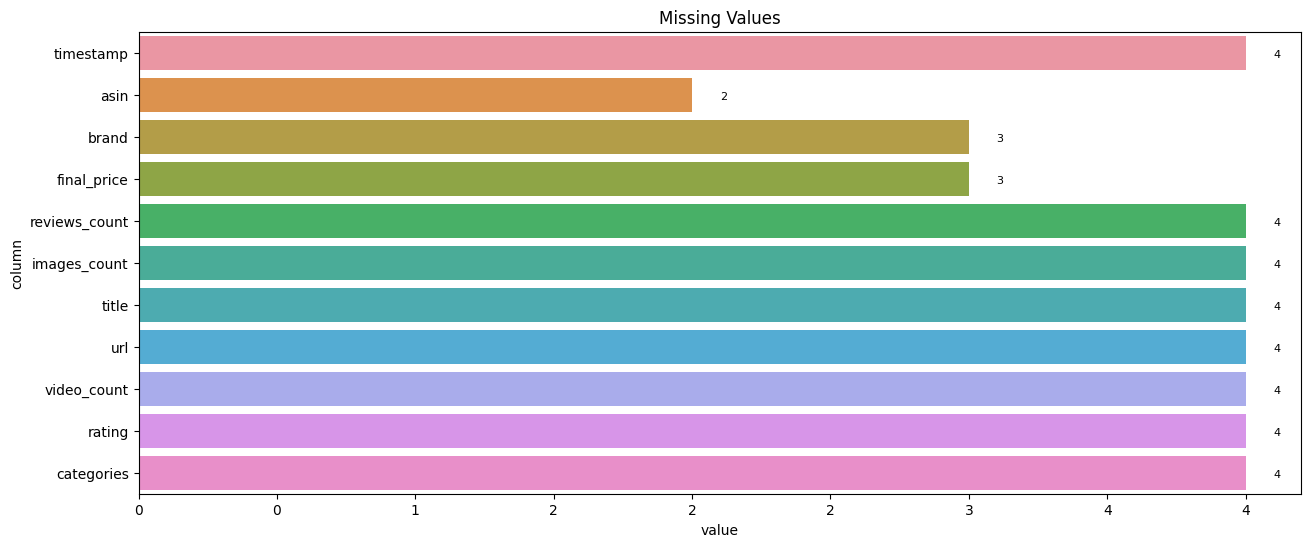

In [18]:
transposed_df = null_counts.toPandas().T.reset_index()

# Rename the columns
transposed_df.columns = ['column', 'value']

# Set the figure size for the chart
plt.figure(figsize=(15, 6))

# Create a horizontal bar chart using Seaborn with the custom figure size
ax = sns.barplot(x='value', y='column', data=transposed_df)
sns.set_palette("dark")

# Set the chart title
plt.title('Missing Values')

for p in ax.patches:
    width = p.get_width()
    value = '{:,.0f}'.format(width)
    x = width + 0.1
    y = p.get_y() + p.get_height() / 2 + 0.1
    ax.annotate(value, (x, y), fontsize=8)
    
# Format y-axis labels with a thousands comma separator
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Display the chart
plt.show()

In [19]:
# Get the first price if there are two prices listed
df = df.withColumn("final_price", split(col("final_price"), " ").getItem(0))

In [20]:
# Drop the rows where the price is missing
df = df.na.drop(subset=["final_price"])

In [21]:
# Remove the $ sign from the final price column and change the data type from string to double
df = df.withColumn("final_price", regexp_replace(col("final_price"), "[US$,]", "").cast('double'))

In [22]:
df.limit(6).toPandas()

,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,categories
0,2022-10-03,B07W5RF3HH,Kensington,29.49,114,5,Kensington Portable Combination Cable Lock for...,https://www.amazon.com/dp/B07W5RF3HH?language=...,1,4.1,"Electronics,Computers & Accessories,Computer A..."
1,2023-09-10,B0C5J3P4FP,Jzyliti,9.99,210,1,Pro Power Saver Power Saver Electricity Saving...,https://www.amazon.com/Electricity-Saving-Hous...,0,3.7,"Electronics,Accessories & Supplies,Power Strip..."
2,2023-09-10,B0BC3Y5LDP,Tamispit,29.99,2087,1,"Smart Watch, 44mm Fitness Tracker Watch with 2...",https://www.amazon.com/tamispit-Swimming-Water...,0,4.0,"Electronics,Wearable Technology,Smartwatches"
3,2023-09-10,B0C8SGDRX5,DYEYOY,29.99,1319,1,951XL Ink Cartridges Compatible Replacement fo...,https://www.amazon.com/Cartridges-Compatible-R...,0,4.4,"Office Products,Office Electronics,Printers & ..."
4,2023-08-22,B08F6T1CJ7,HP,699.00,487,1,HP DesignJet T210 Large Format 24-inch Plotter...,https://www.amazon.com/HP-DesignJet-Compact-Wi...,0,4.4,"Office Products,Office Electronics,Printers & ..."
5,2023-09-10,B07Z6CSMKM,GEEKRIA,15.95,60,1,Geekria Shield Headphones Case Compatible with...,https://www.amazon.com/UltraShell-Cancelling-H...,0,4.4,"Electronics,Headphones, Earbuds & Accessories,..."


In [23]:
# Check the schema
df.printSchema()

root
 |-- timestamp: date (nullable = true)
 |-- asin: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- final_price: double (nullable = true)
 |-- reviews_count: integer (nullable = true)
 |-- images_count: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- video_count: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- categories: string (nullable = true)



In [24]:
df = df.na.drop(subset=["rating"])

In [25]:
# Replace the square brackets and the quotation marks with nothing using regex
df = df.withColumn("categories", regexp_replace(col("categories"), r'[\[\]\"]', ''))

In [26]:
# Creating category array column so we can extract the last element
df = df.withColumn('cat_arr', split(df.categories, ','))

In [27]:
# Creating the detailed category column
df = df.withColumn('detailed_category', df.cat_arr[size(df.cat_arr)-1])

In [28]:
df.limit(5).toPandas()

,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,categories,cat_arr,detailed_category
0,2022-10-03,B07W5RF3HH,Kensington,29.49,114,5,Kensington Portable Combination Cable Lock for...,https://www.amazon.com/dp/B07W5RF3HH?language=...,1,4.1,"Electronics,Computers & Accessories,Computer A...","[Electronics, Computers & Accessories, Compute...",Cable Security Devices
1,2023-09-10,B0C5J3P4FP,Jzyliti,9.99,210,1,Pro Power Saver Power Saver Electricity Saving...,https://www.amazon.com/Electricity-Saving-Hous...,0,3.7,"Electronics,Accessories & Supplies,Power Strip...","[Electronics, Accessories & Supplies, Power St...",Power Strips
2,2023-09-10,B0BC3Y5LDP,Tamispit,29.99,2087,1,"Smart Watch, 44mm Fitness Tracker Watch with 2...",https://www.amazon.com/tamispit-Swimming-Water...,0,4.0,"Electronics,Wearable Technology,Smartwatches","[Electronics, Wearable Technology, Smartwatches]",Smartwatches
3,2023-09-10,B0C8SGDRX5,DYEYOY,29.99,1319,1,951XL Ink Cartridges Compatible Replacement fo...,https://www.amazon.com/Cartridges-Compatible-R...,0,4.4,"Office Products,Office Electronics,Printers & ...","[Office Products, Office Electronics, Printers...",Inkjet Ink Cartridges
4,2023-08-22,B08F6T1CJ7,HP,699.00,487,1,HP DesignJet T210 Large Format 24-inch Plotter...,https://www.amazon.com/HP-DesignJet-Compact-Wi...,0,4.4,"Office Products,Office Electronics,Printers & ...","[Office Products, Office Electronics, Printers...",Wide Format & Plotter Printers


In [29]:
pd.options.display.max_colwidth = None

In [30]:
df.select('brand', 'title', 'categories', 'detailed_category').limit(5).toPandas()

,brand,title,categories,detailed_category
0,Kensington,Kensington Portable Combination Cable Lock for Laptops and Other Devices - Red (K64671AM),"Electronics,Computers & Accessories,Computer Accessories & Peripherals,Cable Security Devices",Cable Security Devices
1,Jzyliti,Pro Power Saver Power Saver Electricity Saving Device Save Electricity Electricity Saving Box Household Office Market Device Electric US Plug 90V-250V 30KW 2 Pack,"Electronics,Accessories & Supplies,Power Strips & Surge Protectors,Power Strips",Power Strips
2,Tamispit,"Smart Watch, 44mm Fitness Tracker Watch with 24 Sports Modes, 5ATM Swimming Waterproof, Sleep Monitor Step Calorie Counter, 1.7"" HD Touchscreen Smartwatch for Men Women iPhone iOS Android Compatiable","Electronics,Wearable Technology,Smartwatches",Smartwatches
3,DYEYOY,"951XL Ink Cartridges Compatible Replacement for HP 951XL Ink Cartridges Combo Pack High Yield use with OfficeJet Pro 8610 8600 8615 8620 8625 276dw 251dw (1 Cyan, 1 Magenta, 1 Yellow, 3 Pack)","Office Products,Office Electronics,Printers & Accessories,Printer Parts & Accessories,Printer Ink & Toner,Inkjet Ink Cartridges",Inkjet Ink Cartridges
4,HP,"HP DesignJet T210 Large Format 24-inch Plotter Printer, with Modern Office Design (8AG32A), Black","Office Products,Office Electronics,Printers & Accessories,Printers,Wide Format & Plotter Printers",Wide Format & Plotter Printers


In [31]:
# Count the distinct values in the detailed_category column
(df.groupBy('detailed_category').count()).count()

234

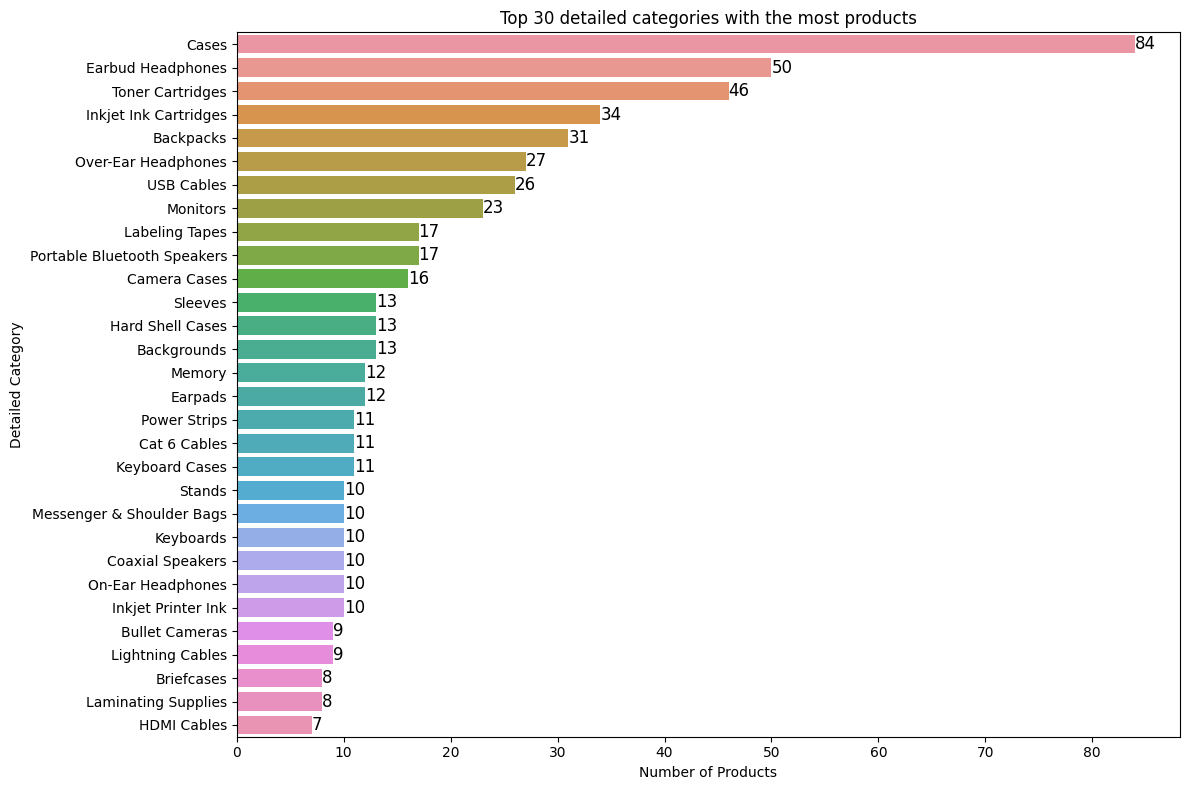

In [32]:
# Group by 'detailed_category' and count the number of rows for each category
grouped_df = df.groupBy("detailed_category").agg(count("*").alias("count"))
top_30_df = grouped_df.orderBy(col("count").desc()).limit(30)
pandas_df = top_30_df.toPandas()

# print(pandas_df)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="detailed_category", data=pandas_df)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Format the data labels with a thousands comma separator and add them to the bars
for index, value in enumerate(pandas_df["count"]):ax.text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

ax.set_xlabel("Number of Products")
ax.set_ylabel("Detailed Category")
ax.set_title("Top 30 detailed categories with the most products")

plt.tight_layout()
plt.show()

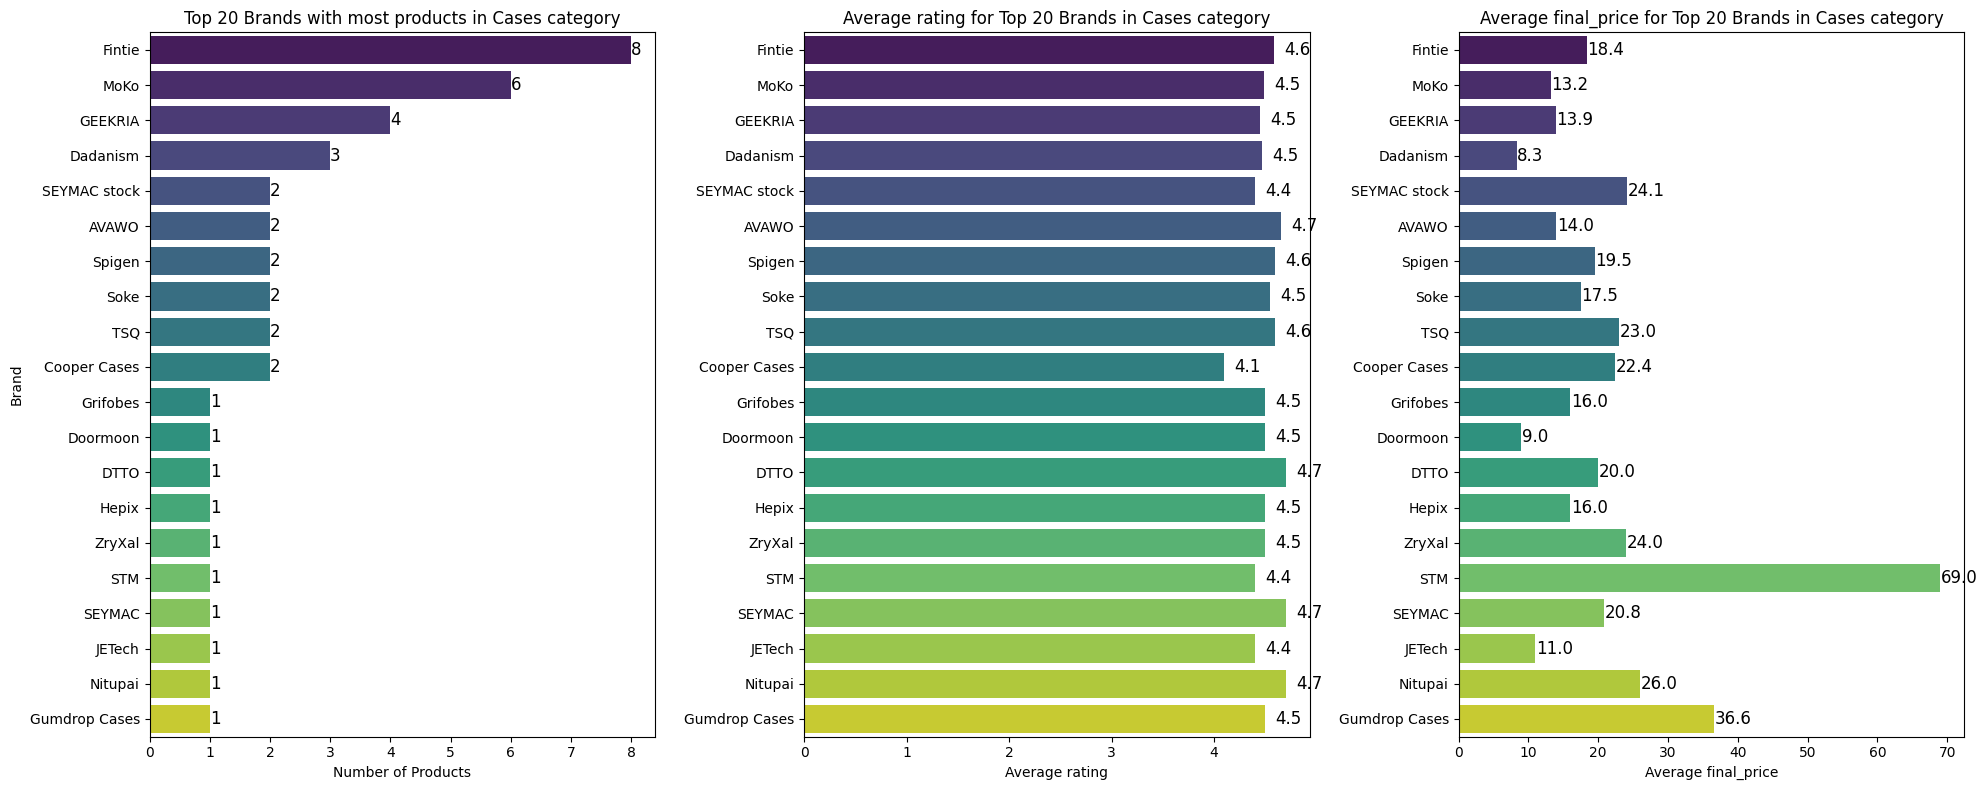

In [33]:
# Define the variables that we want to specify
det_cat = "Cases"
metric1 = "rating"
metric2 = "final_price"

filtered_df = df.filter(col("detailed_category") == det_cat)
grouped_df = filtered_df.groupBy("brand").agg(count("*").alias("brand_count"))
avg_metric1_df = filtered_df.groupBy("brand").agg(avg(metric1).alias("avg_metric1"))
avg_metric2_df = filtered_df.groupBy("brand").agg(avg(metric2).alias("avg_metric2"))
pandas_df = grouped_df.join(avg_metric1_df, on="brand", how="inner").join(avg_metric2_df, on="brand", how="inner").toPandas()

# Sort the DataFrame in descending order based on brand count
pandas_df = pandas_df.sort_values(by="brand_count", ascending=False)
pandas_df = pandas_df.head(20)
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot the first horizontal bar chart for brand count
sns.barplot(x="brand_count", y="brand", data=pandas_df, palette="viridis", ax=axes[0])

# Format the data labels for brand count
for index, value in enumerate(pandas_df["brand_count"]):axes[0].text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

# Format the x-axis labels for brand count
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Set labels and title for the first plot
axes[0].set_xlabel("Number of Products")
axes[0].set_ylabel("Brand")
axes[0].set_title("Top 20 Brands with most products in " + det_cat + " category")

# Plot the second horizontal bar chart for average metric (final_price)
sns.barplot(x="avg_metric1", y="brand", data=pandas_df, palette="viridis", ax=axes[1])

# Set a small offset for the data labels
label_offset = 0.1

# Format the data labels for average metric (final_price)
for index, value in enumerate(pandas_df["avg_metric1"]):axes[1].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Set labels and title for the second plot
axes[1].set_xlabel("Average " + metric1)
axes[1].set_ylabel("")  # Hide the ylabel for the second plot
axes[1].set_title("Average " + metric1 + " for Top 20 Brands in " + det_cat + " category")

# Plot the third horizontal bar chart for average rating
sns.barplot(x="avg_metric2", y="brand", data=pandas_df, palette="viridis", ax=axes[2])

# Format the data labels for average rating
for index, value in enumerate(pandas_df["avg_metric2"]):axes[2].text(value + label_offset, index, f"{value:.1f}", ha='left', va='center', color='black', fontsize=12)

# Set labels and title for the third plot
axes[2].set_xlabel("Average " + metric2)
axes[2].set_ylabel("")  
axes[2].set_title("Average " + metric2 + " for Top 20 Brands in " + det_cat + " category")
plt.tight_layout()
plt.show()

In [34]:
brands = ['STM','Gumdrop Cases'] # expensive
# brands = ['SEYMAC stock','TSQ'] # medium
# brands = ['Doormoon','Dadanism'] # cheap

(df.filter(col("brand").isin(brands) & (col("detailed_category") == det_cat)).sort(col("rating").desc()).toPandas())

,timestamp,asin,brand,final_price,reviews_count,images_count,title,url,video_count,rating,categories,cat_arr,detailed_category
0,2023-04-26,B07NH3HGFF,Gumdrop Cases,36.60,770,8,"Gumdrop DropTech Laptop Case Fits Dell Chromebook 3110/3100 2-in-1. Designed for K-12 Students, Teachers and Classrooms – Drop Tested, Rugged, Shockproof Bumpers for Reliable Device Protection – Black",https://www.amazon.com/dp/B07NH3HGFF?language=en_US&currency=USD,2,4.5,"Electronics,Computers & Accessories,Tablet Accessories,Bags, Cases & Sleeves,Cases","[Electronics, Computers & Accessories, Tablet Accessories, Bags, Cases & Sleeves, Cases]",Cases
1,2023-05-23,B07V9PJMBC,STM,68.99,177,6,STM Dux Plus Duo case for iPad Air 3rd gen/Pro 10.5 - Black (stm-222-236JV-01),https://www.amazon.com/dp/B07V9PJMBC?language=en_US&currency=USD,1,4.4,"Electronics,Computers & Accessories,Tablet Accessories,Bags, Cases & Sleeves,Cases","[Electronics, Computers & Accessories, Tablet Accessories, Bags, Cases & Sleeves, Cases]",Cases


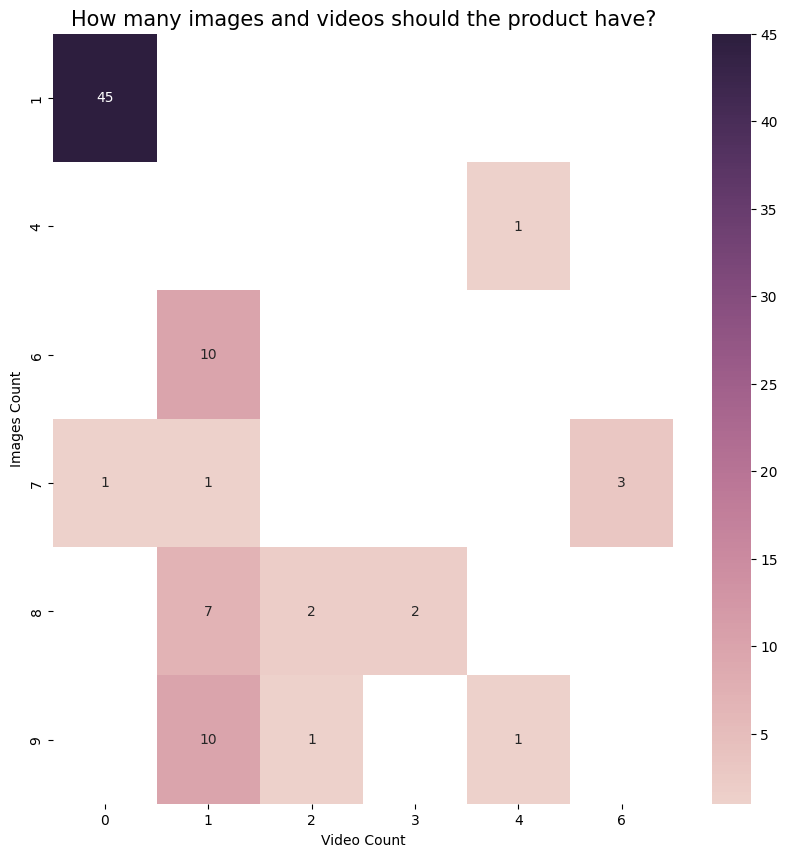

In [35]:
# To further analyse the marketing stratergies of companies
brands = ['STM','Gumdrop Cases'] # expensive
# brands = ['SEYMAC stock','TSQ'] # medium
# brands = ['Doormoon','Dadanism'] # cheap

df_filtered = df.filter(col("brand").isin(brands) & (col("detailed_category") == det_cat))

# Group by 'images_count' and 'video_count' and count the datapoints
grouped_df = filtered_df.groupBy("images_count", "video_count").count()

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = grouped_df.toPandas()

plt.figure(figsize=(10, 10))
heatmap_data = pandas_df.pivot(index = "images_count", columns = "video_count", values = "count")
sns.heatmap(heatmap_data, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=True, fmt=",g")

plt.xlabel("Video Count")
plt.ylabel("Images Count")
plt.title("How many images and videos should the product have?", fontsize=15)
plt.show()